# Assignment 4


Question 1:
Write a code to apply the PCA (Principal Component Analysis) algorithm on the “Digits" dataset
and visualize the reduced-dimensional data using Python with sci-kit-learn and Matplotlib.
Hints: Reduce the dimensionality from 64 to 2 principal components.

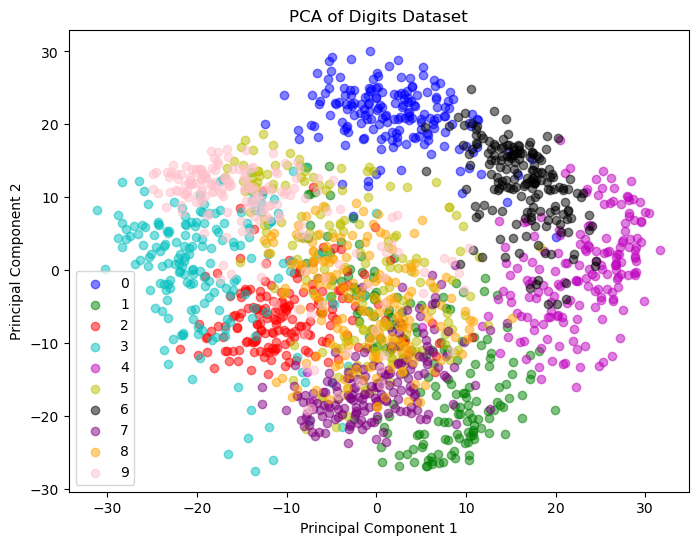

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Visualize the reduced-dimensional data
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'pink']
for i in range(10):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=colors[i], label=str(i), alpha=0.5)
plt.title('PCA of Digits Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.show()

Question 2:
Given a dataset containing categorical and continuous features, write a code using Python with
sci-kit-learn to preprocess the data using binarization, label encoding, and label binarization to
prepare it for a machine learning model. Save the final data in your local repository.
```
data = {
"City": ["New York", "Los Angeles", "Chicago", "Miami", "Boston"],
"Temperature (C)": [20, 25, 15, 30, 18],
"Humidity (%)": [65, 70, 60, 75, 55],
"Month": ["January", "February", "March", "April", "May"],
"Target": ["Yes", "No", "Yes", "No", "Yes"]
}
```

In [2]:
import pandas as pd
from sklearn.preprocessing import Binarizer, LabelEncoder, LabelBinarizer
data = {
    "City": ["New York", "Los Angeles", "Chicago", "Miami", "Boston"],
    "Temperature (C)": [20, 25, 15, 30, 18],
    "Humidity (%)": [65, 70, 60, 75, 55],
    "Month": ["January", "February", "March", "April", "May"],
    "Target": ["Yes", "No", "Yes", "No", "Yes"]
}
df = pd.DataFrame(data)
binarizer = Binarizer(threshold=25) 
df['Temperature (Binarized)'] = binarizer.fit_transform(df[['Temperature (C)']])
df['Humidity (Binarized)'] = binarizer.fit_transform(df[['Humidity (%)']])
label_encoder = LabelEncoder()
df['City (Encoded)'] = label_encoder.fit_transform(df['City'])
df['Month (Encoded)'] = label_encoder.fit_transform(df['Month'])
label_binarizer = LabelBinarizer()
df['Target (Binarized)'] = label_binarizer.fit_transform(df['Target'])
df.drop(['City', 'Month', 'Target'], axis=1, inplace=True)
df.to_csv('preprocessed_data.csv', index=False)
print("Preprocessed Data:")
print(df)

Preprocessed Data:
   Temperature (C)  Humidity (%)  Temperature (Binarized)  \
0               20            65                        0   
1               25            70                        0   
2               15            60                        0   
3               30            75                        1   
4               18            55                        0   

   Humidity (Binarized)  City (Encoded)  Month (Encoded)  Target (Binarized)  
0                     1               4                2                   1  
1                     1               2                1                   0  
2                     1               1                3                   1  
3                     1               3                0                   0  
4                     1               0                4                   1  


Question 3:
Write a code to build a fully connected neural network with TensorFlow consisting of an input
layer having 1000 neurons, three hidden layers with neurons H1: 512, H2: 128, H3: 64) with relu
activation function, give a dropout of 15% between the second and third hidden layers, and an
output layer with ten neurons and having softmax activation function. Finally, print its summary.

In [1]:
import tensorflow as tf
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1000, input_shape=(1000,), activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Print model summary
model.summary()

C:\Users\Student\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Student\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,588,082 (6.06 MB)

 Trainable params: 1,588,082 (6.06 MB)

 Non-trainable params: 0 (0.00 B)

Question 5:
Write the full calculation and answers to this question in your assignment copy.
Annual Revenue data for a company given as
```
Y       |2014 | 2015 | 2016 | 2017 | 2018 | 2019 | 2020 | 2021 | 2022 | 2023 | 2024

Rev. In |61.2 | 58.3 | 67.1 | 69.2 | 68.9 | 83.5 | 89.1 | 80   | 92.3 | 93   | 97
billion 
Rupee
s

a) Draw a least square line fitting the data.
b) What is the expected revenue in 2025?
c) Analyze expected errors (RMSE) in predictions.
```

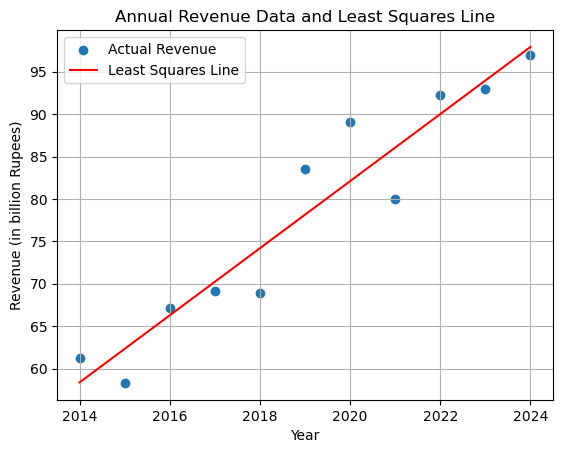

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
# Given data
years = np.array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
revenue = np.array([61.2, 58.3, 67.1, 69.2, 68.9, 83.5, 89.1, 80, 92.3, 93, 97])
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, revenue)
# Calculate the line of best fit
line = slope * years + intercept
# Plot the data points and the line of best fit
plt.scatter(years, revenue, label='Actual Revenue')
plt.plot(years, line, color='red', label='Least Squares Line')
plt.xlabel('Year')
plt.ylabel('Revenue (in billion Rupees)')
plt.title('Annual Revenue Data and Least Squares Line')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Predict revenue for 2025
year_2025 = 2025
revenue_2025 = slope * year_2025 + intercept
print("Predicted revenue for 2025:", revenue_2025, "billion Rupees")

Predicted revenue for 2025: 101.88363636363647 billion Rupees


In [6]:
# Calculate predicted revenues for each year using the least squares line
predicted_revenues = slope * years + intercept
# Calculate RMSE
rmse = np.sqrt(np.mean((revenue - predicted_revenues)**2))
print("Root Mean Squared Error (RMSE) in predictions:", rmse, "billion Rupees")

Root Mean Squared Error (RMSE) in predictions: 3.9920126865099244 billion Rupees


Question 6:
Write a code using the Python sci-kit-learn library for the diabetes dataset available in
sci-kit-learn to implement simple linear regression. Additionally, print the weights and bias
coefficients.

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 2] 
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficient (weight):", model.coef_[0])
print("Intercept (bias):", model.intercept_)

Coefficient (weight): 998.5776891374658
Intercept (bias): 152.00335421448224


Question 7:
Write the Python program using sci-kit-learn to implement a housing price prediction task using
multiple linear regression. The program should include steps for loading a housing dataset,
preprocessing the data, training a multiple linear regression model, making predictions, and
evaluating the model's performance.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
url = "https://raw.githubusercontent.com/gauraviiita/Supervised_ML/main/Datasets/housing_price/Housing%20Price%20data%20set.csv"
housing_data = pd.read_csv(url)
X = housing_data.drop('price', axis=1) 
y = housing_data['price']               
categorical_cols = X.select_dtypes(include=['object']).columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_encoded = ct.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 254583183.32698828
